In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import env
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = df[['petal_width','sepal_width']]

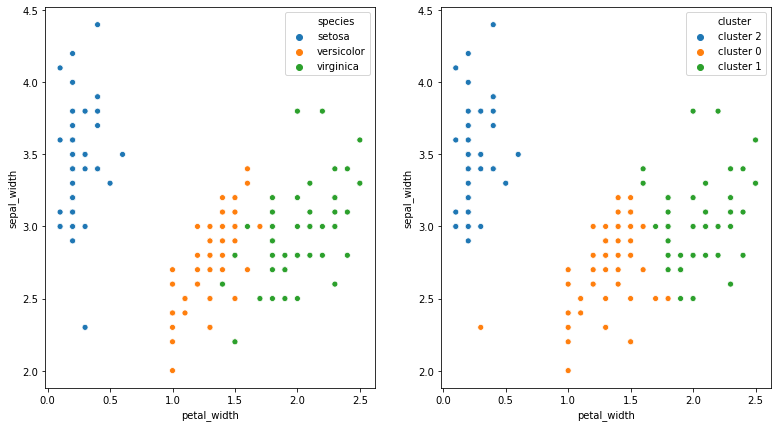

In [4]:
kmeans = KMeans(3)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)
df.cluster = 'cluster ' + df.cluster.astype(str)

plt.rc('figure',figsize=(13, 7))

plt.subplot(121)
sns.scatterplot(df.petal_width, df.sepal_width, hue=df.species)
plt.legend()
plt.xlabel('petal_width')
plt.ylabel('sepal_width')
plt.subplot(122)
sns.scatterplot(df.petal_width, df.sepal_width, hue=df.cluster)

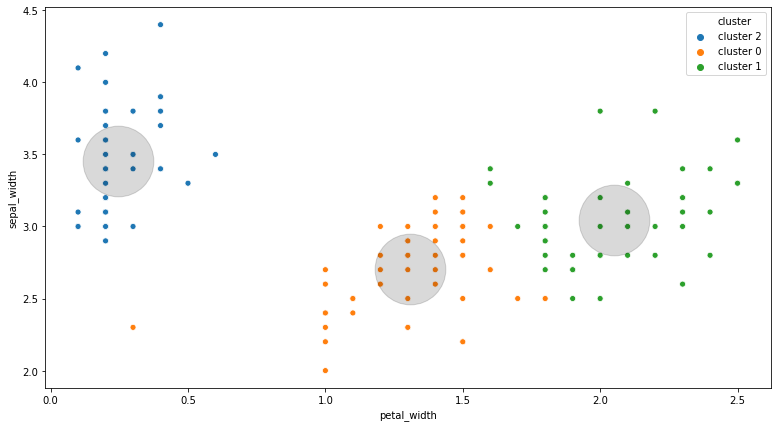

In [5]:
sns.scatterplot(df.petal_width, df.sepal_width, hue=df.cluster)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids.plot.scatter(y='sepal_width', x='petal_width',
                       ax=plt.gca(), alpha=.15, s=5000, c='black')
plt.legend()

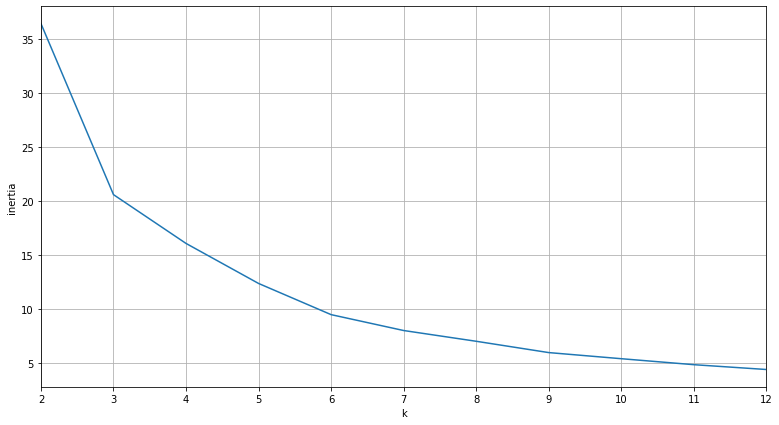

In [6]:
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

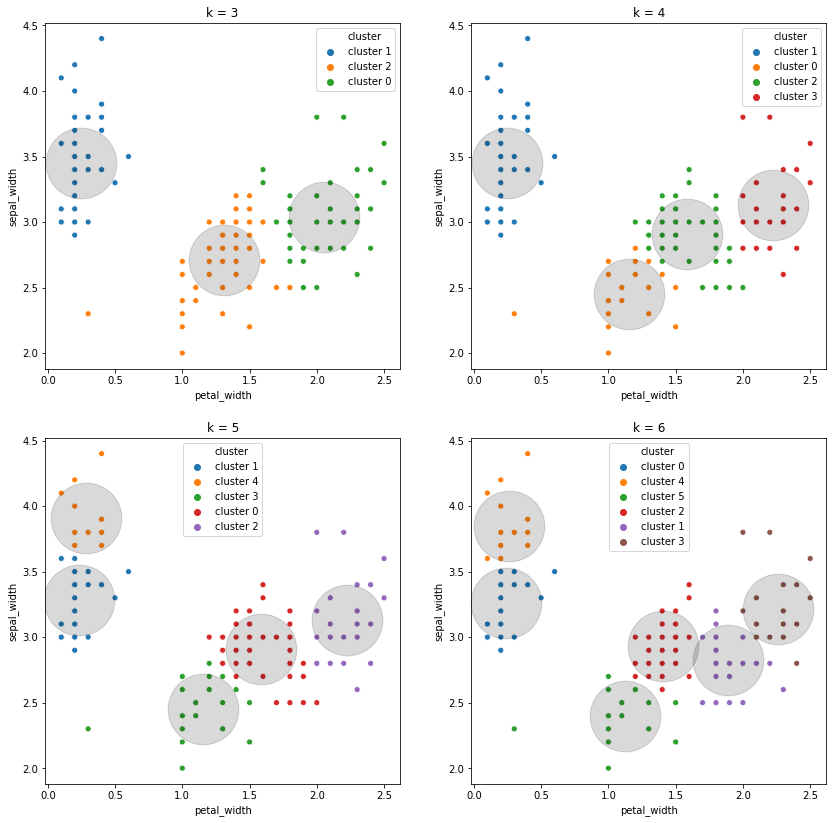

In [7]:
plt.figure(figsize=(14, 14))
for i, k in enumerate([3, 4, 5, 6]):
    plt.subplot(2, 2, i + 1)
    kmeans = KMeans(k)
    kmeans.fit(X)
    df['cluster'] = kmeans.predict(X)
    df.cluster = 'cluster ' + df.cluster.astype(str)
    sns.scatterplot(df.petal_width, df.sepal_width, hue=df.cluster)
    centroids = pd.DataFrame(kmeans.cluster_centers_, 
                             columns=X.columns)
    centroids.plot.scatter(y='sepal_width', x='petal_width', 
                           ax=plt.gca(), alpha=.15, s=5000, 
                           c='black')
    plt.title(f'k = {k}')

In [8]:
X2 = df[['petal_width','sepal_width', 'petal_length']]

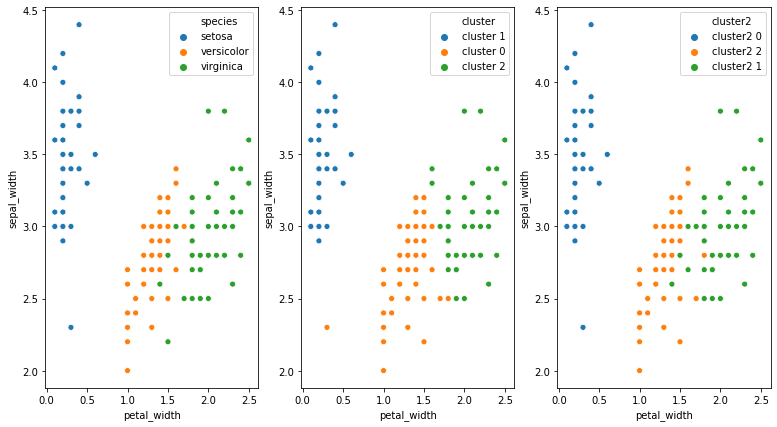

In [9]:
kmeans = KMeans(3)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)
df.cluster = 'cluster ' + df.cluster.astype(str)

kmeans.fit(X2)
df['cluster2'] = kmeans.predict(X2)
df.cluster2 = 'cluster2 ' + df.cluster2.astype(str)

plt.rc('figure',figsize=(13, 7))

plt.subplot(131)
sns.scatterplot(df.petal_width, df.sepal_width, hue=df.species)
plt.subplot(132)
sns.scatterplot(df.petal_width, df.sepal_width, hue=df.cluster)
plt.legend()
plt.xlabel('petal_width')
plt.ylabel('sepal_width')
plt.subplot(133)
sns.scatterplot(df.petal_width, df.sepal_width, hue=df.cluster2)

In [10]:
df.cluster.replace({'cluster 1': 'setosa', 'cluster 0': 'versicolor',
                    'cluster 2': 'virginica'}, inplace=True)
df.cluster2.replace({'cluster2 0': 'setosa', 'cluster2 2': 'versicolor',
                    'cluster2 1': 'virginica'}, inplace=True)

In [11]:
(df.species == df.cluster).sum() / df.shape[0], \
(df.species == df.cluster2).sum() / df.shape[0]

(0.9266666666666666, 0.9533333333333334)

In [12]:
url = env.get_db_url('mall_customers')
query = '''
    SELECT * FROM customers
'''
df = pd.read_sql(query, url)

In [13]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
len(df.spending_score.value_counts())

84

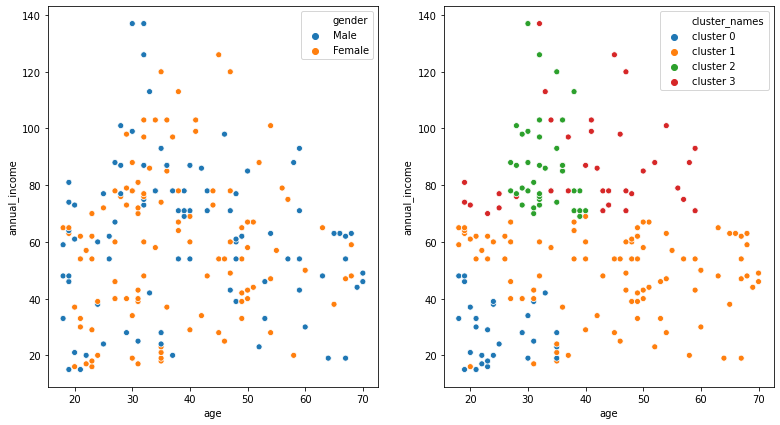

In [15]:
X = df[['age','annual_income','spending_score']]

kmeans = KMeans(4)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)
df['cluster_names'] = 'cluster ' + df.cluster.astype(str)

plt.subplot(121)
sns.scatterplot(df.age, df.annual_income, hue=df.gender)
plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.subplot(122)
sns.scatterplot(df.age, df.annual_income, hue=df.cluster_names)

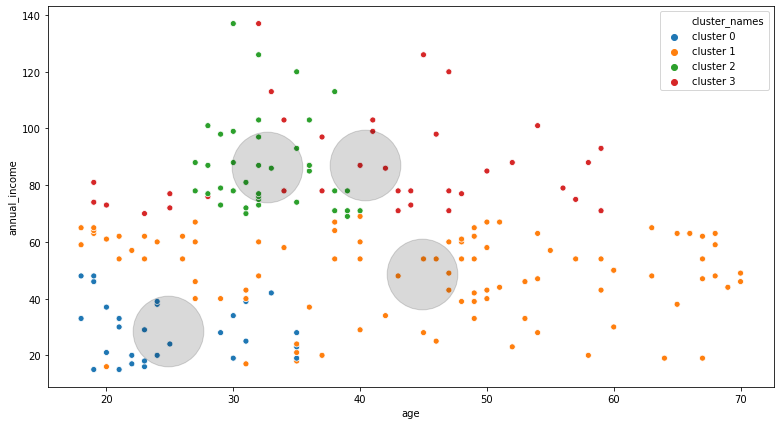

In [16]:
sns.scatterplot(df.age, df.annual_income, hue=df.cluster_names)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids.plot.scatter(x='age', y='annual_income',
                       ax=plt.gca(), alpha=.15, s=5000, c='black')
plt.legend()

In [17]:
df.groupby('cluster').age.mean()

cluster
0    24.821429
1    44.894737
2    32.692308
3    40.394737
Name: age, dtype: float64

In [18]:
scaler = MinMaxScaler()
X2 = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X2.head(5)

,age,annual_income,spending_score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


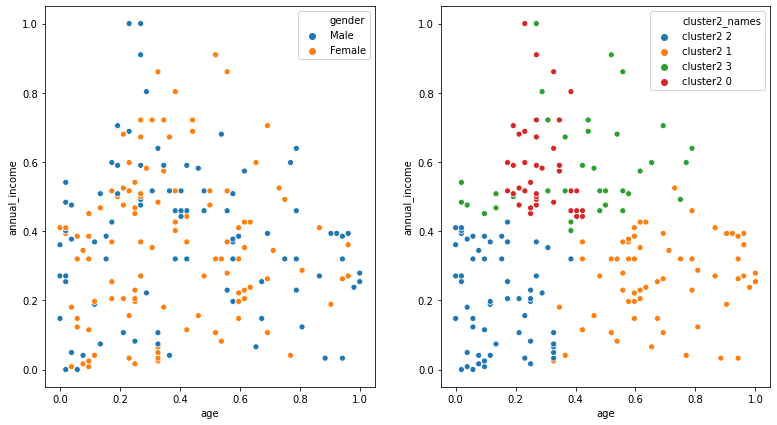

In [19]:
kmeans2 = KMeans(4)
kmeans2.fit(X2)
df['cluster2'] = kmeans2.predict(X2)
df['cluster2_names'] = 'cluster2 ' + df.cluster2.astype(str)

plt.subplot(121)
sns.scatterplot(X2.age, X2.annual_income, hue=df.gender)
plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.subplot(122)
sns.scatterplot(X2.age, X2.annual_income, hue=df.cluster2_names)

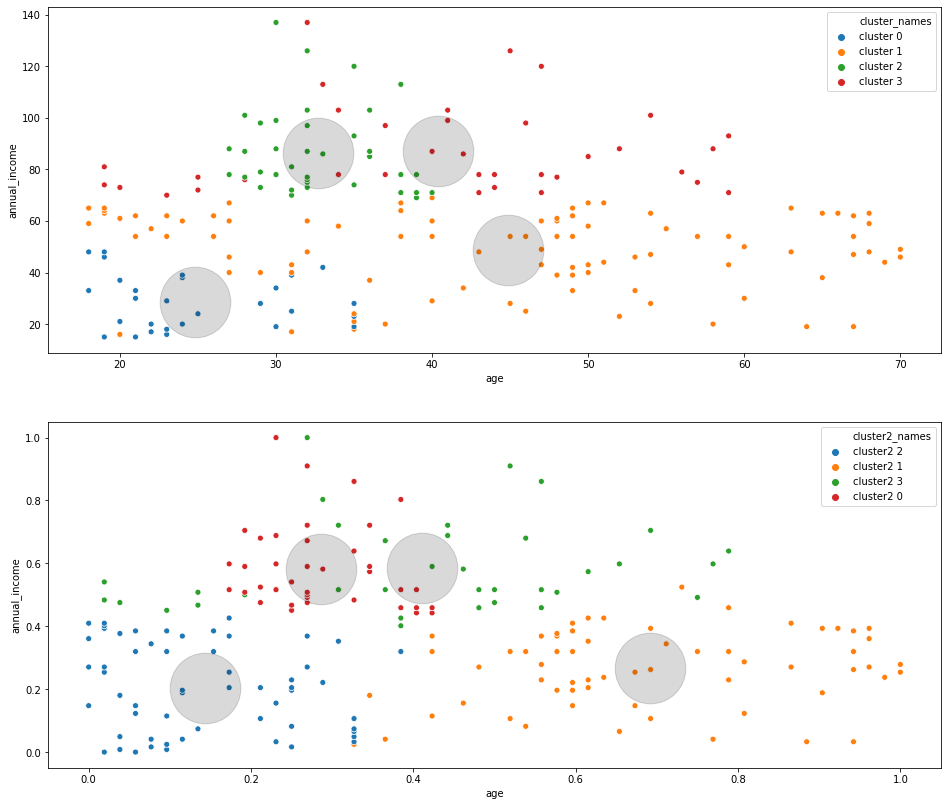

In [23]:
f, axes = plt.subplots(2,1, figsize=(16,14))
sns.scatterplot(X.age, X.annual_income, hue=df.cluster_names,
                        ax=axes[0])
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids.plot.scatter(x='age', y='annual_income', ax=axes[0],
                        alpha=.15, s=5000, c='black')
sns.scatterplot(X2.age, X2.annual_income, hue=df.cluster2_names, 
                        ax=axes[1])
centroids = pd.DataFrame(kmeans2.cluster_centers_, columns=X2.columns)
centroids.plot.scatter(x='age', y='annual_income', ax=axes[1],
                        alpha=.15, s=5000, c='black')

In [21]:
from mpl_toolkits.mplot3d import Axes3D

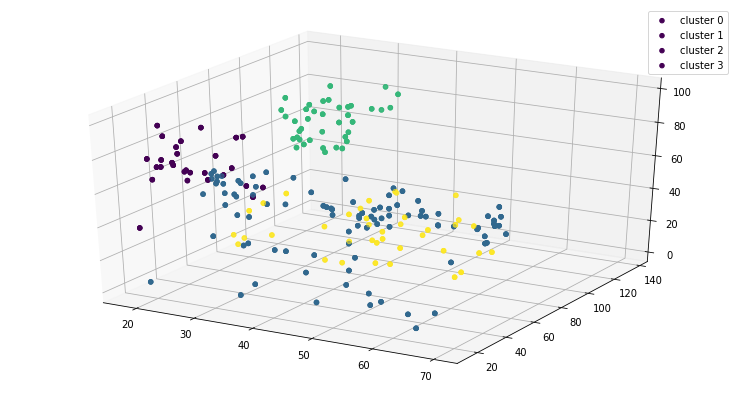

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cluster, subset in df.groupby('cluster_names'):
    ax.scatter(X.age, X.annual_income, X.spending_score, 
           c=df.cluster.tolist(), label=cluster)
plt.legend()